In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from seaborn import kdeplot
from sklearn.neighbors import KernelDensity
plt.rcParams.update({'font.size': 14})

In [ ]:
file_nl = h5py.File('tnl/main2_NL.o2','r')
col_nl = file_nl['markov_chain_0']['data']
mmax_nl = np.array(col_nl['M_max'])
sn_lm_nl = np.array(col_nl['SN_LM'])
r53_nl = np.array(col_nl['R_53'])
p23_nl = np.array(col_nl['Phc_23'])
wgt_nl = np.array(col_nl['log_wgt'])
sn_ns_nl = np.array(col_nl['SN_NS'])
sn_wd_nl = np.array(col_nl['SN_WD'])

file_np = h5py.File('tmp/main2_NP.o2','r')
col_np = file_np['markov_chain_0']['data']
mmax_np = np.array(col_np['M_max'])
sn_lm_np = np.array(col_np['SN_LM'])
r53_np = np.array(col_np['R_53'])
p23_np = np.array(col_np['Phc_23'])
wgt_np = np.array(col_np['log_wgt'])
sn_ns_np = np.array(col_np['SN_NS'])
sn_wd_np = np.array(col_np['SN_WD'])

file_ml = h5py.File('tmp/main2_ML.o2','r')
col_ml = file_ml['markov_chain_0']['data']
mmax_ml = np.array(col_ml['M_max'])
sn_lm_ml = np.array(col_ml['SN_LM'])
r53_ml = np.array(col_ml['R_53'])
p23_ml = np.array(col_ml['Phc_23'])
wgt_ml = np.array(col_ml['log_wgt'])
sn_ns_ml = np.array(col_ml['SN_NS'])
sn_wd_ml = np.array(col_ml['SN_WD'])

file_mp = h5py.File('tmp/main2_MP.o2','r')
col_mp = file_mp['markov_chain_0']['data']
mmax_mp = np.array(col_mp['M_max'])
sn_lm_nl = np.array(col_nl['SN_LM'])
r53_nl = np.array(col_nl['R_53'])
p23_nl = np.array(col_nl['Phc_23'])
wgt_nl = np.array(col_nl['log_wgt'])
sn_ns_nl = np.array(col_nl['SN_NS'])
sn_wd_nl = np.array(col_nl['SN_WD'])

## Maximum Mass

In [ ]:
den_nl = stats.gaussian_kde(mmax_nl)
den_np = stats.gaussian_kde(mmax_np)
den_ml = stats.gaussian_kde(mmax_ml)
den_nl = stats.gaussian_kde(mmax_nl)
x = np.linspace(1.95, \
                np.max(np.concatenate((mmax_nl, mmax_np, mmax_ml, mmax_mp))), \
                num=100, dtype=float)
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6), dpi=600)
plt.plot(x, den_nl(x), label='NL')
plt.plot(x, den_np(x), label='NP')
plt.plot(x, den_ml(x), label='ML')
plt.plot(x, den_mp(x), label='MP')
plt.minorticks_on()
plt.tick_params('both', length=12, width=1, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.xlabel('$M_\mathrm{max} \ [M_\odot]$')
plt.ylabel('$\mathcal{P} \ (M_\mathrm{max})$')
plt.grid(which='major', linewidth=0.2, visible=True)
plt.grid(which='minor', linewidth=0.1, visible=True)
plt.legend()
plt.savefig('figs/hist_mmax.png', format='png', dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
plt.rcParams.update({'font.size': 28})
plt.figure(figsize=(16,12), dpi=1200)
kdeplot(mmax_nl, label='NL')
kdeplot(mmax_np, label='NP')
kdeplot(mmax_ml, label='ML')
kdeplot(mmax_mp, label='MP')
plt.xlim(np.min(np.concatenate((mmax_nl, mmax_np, mmax_ml, mmax_mp)))-0.05, \
         np.max(np.concatenate((mmax_nl, mmax_np, mmax_ml, mmax_mp)))+0.05)
plt.ylim(-0.25, 5.45)
plt.minorticks_on()
plt.tick_params('both', length=20, width=2, which='major')
plt.tick_params('both', length=10, width=2, which='minor')
plt.xlabel('$M_\mathrm{max} \ [M_\odot]$')
plt.ylabel('$\mathcal{P} \ (M_\mathrm{max})$')
plt.grid(which='major', linewidth=0.4, visible=True)
plt.grid(which='minor', linewidth=0.2, visible=True)
plt.legend()
plt.savefig('figs/kde_mmax.png', format='png', dpi=1200, bbox_inches='tight')
plt.show()

In [ ]:
file_ml= h5py.File('tmp/esmr_ML.o2','r')
list(file_ml.keys())
prob_ml = file_ml['ed_pr_3d']['data']['prob']

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(15,20))
ax[0,0].scatter(r53_nl,  sn_lm_nl, marker='o', s=1, c=wgt_nl, cmap='cividis')
ax[0,1].scatter(p23_nl,  sn_lm_nl, marker='o', s=1, c=wgt_nl, cmap='cividis')
ax[0,2].scatter(mmax_nl, sn_lm_nl, marker='o', s=1, c=wgt_nl, cmap='cividis')
ax[1,0].scatter(r53_np,  sn_lm_np, marker='o', s=1, c=wgt_np, cmap='cividis')
ax[1,1].scatter(p23_np,  sn_lm_np, marker='o', s=1, c=wgt_np, cmap='cividis')
ax[1,2].scatter(mmax_np, sn_lm_np, marker='o', s=1, c=wgt_np, cmap='cividis')
ax[2,0].scatter(r53_ml,  sn_lm_ml, marker='o', s=1, c=wgt_ml, cmap='cividis')
ax[2,1].scatter(p23_ml,  sn_lm_ml, marker='o', s=1, c=wgt_ml, cmap='cividis')
ax[2,2].scatter(mmax_ml, sn_lm_ml, marker='o', s=1, c=wgt_ml, cmap='cividis')
ax[3,0].scatter(r53_mp,  sn_lm_mp, marker='o', s=1, c=wgt_mp, cmap='cividis')
ax[3,1].scatter(p23_mp,  sn_lm_mp, marker='o', s=1, c=wgt_mp, cmap='cividis')
ax[3,2].scatter(mmax_mp, sn_lm_mp, marker='o', s=1, c=wgt_mp, cmap='cividis')
ax[0,0].text(0.1, 0.9, 'NL', transform=ax[0,0].transAxes)
ax[1,0].text(0.1, 0.9, 'NP', transform=ax[1,0].transAxes)
ax[2,0].text(0.1, 0.9, 'ML', transform=ax[2,0].transAxes)
ax[3,0].text(0.1, 0.9, 'MP', transform=ax[3,0].transAxes)
ax[3,0].set_xlabel('$R_{1.7M_\odot}$ [km]')
ax[3,1].set_xlabel('$P~(\epsilon \simeq 500)$ [MeV/fm$^3]$')
ax[3,2].set_xlabel('$M_\mathrm{max}~[M_\odot]$')
for i in range(4):
    for j in range(3):
        ax[i,j].minorticks_on()
        ax[i,j].tick_params('both', length=10, width=1, which='major')
        ax[i,j].tick_params('both', length=5, width=1, which='minor')
        if j%3==0:
            ax[i,j].set_ylabel('$\mathcal{P}~(M=1.7 M_\odot$)')
fig.savefig('figs/scat_lmxb.pdf', format='pdf', bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(22,30))
ax[0,0].scatter(sn_lm_nl, sn_ns_nl, marker='o', s=1, c=wgt_nl, cmap='cividis')
ax[0,1].scatter(sn_lm_nl, sn_wd_nl, marker='o', s=1, c=wgt_nl, cmap='cividis')
ax[0,2].scatter(sn_ns_nl, sn_wd_nl, marker='o', s=1, c=wgt_nl, cmap='cividis')
ax[1,0].scatter(sn_lm_np, sn_ns_np, marker='o', s=1, c=wgt_np, cmap='cividis')
ax[1,1].scatter(sn_lm_np, sn_wd_np, marker='o', s=1, c=wgt_np, cmap='cividis')
ax[1,2].scatter(sn_ns_np, sn_wd_np, marker='o', s=1, c=wgt_np, cmap='cividis')
ax[2,0].scatter(sn_lm_ml, sn_ns_ml, marker='o', s=1, c=wgt_ml, cmap='cividis')
ax[2,1].scatter(sn_lm_ml, sn_wd_ml, marker='o', s=1, c=wgt_ml, cmap='cividis')
ax[2,2].scatter(sn_ns_ml, sn_wd_ml, marker='o', s=1, c=wgt_ml, cmap='cividis')
ax[3,0].scatter(sn_lm_mp, sn_ns_mp, marker='o', s=1, c=wgt_mp, cmap='cividis')
ax[3,1].scatter(sn_lm_mp, sn_wd_mp, marker='o', s=1, c=wgt_mp, cmap='cividis')
ax[3,2].scatter(sn_ns_mp, sn_wd_mp, marker='o', s=1, c=wgt_mp, cmap='cividis')
ax[0,0].text(0.1, 0.9, 'NL', transform=ax[0,0].transAxes)
ax[1,0].text(0.1, 0.9, 'NP', transform=ax[1,0].transAxes)
ax[2,0].text(0.1, 0.9, 'ML', transform=ax[2,0].transAxes)
ax[3,0].text(0.1, 0.9, 'MP', transform=ax[3,0].transAxes)
for i in range(4):
    for j in range(3):
        ax[i,j].tick_params('both', length=10, width=1, which='major')
        ax[i,j].tick_params('both', length=5, width=1, which='minor')
        if j==0:
            ax[i,j].set_xlabel('$\mathcal{P}~(M=1.7 M_\odot$)')
            ax[i,j].set_ylabel('$\mathcal{P}~(M=1.4 M_\odot$)')
            ax[i,j+1].set_xlabel('$\mathcal{P}~(M=1.7 M_\odot$)')
            ax[i,j+1].set_ylabel('$\mathcal{P}~(M=1.6 M_\odot$)')
            ax[i,j+2].set_xlabel('$\mathcal{P}~(M=1.4 M_\odot$)')
            ax[i,j+2].set_ylabel('$\mathcal{P}~(M=1.6 M_\odot$)')
fig.savefig('figs/scat_lmxb2.pdf', format='pdf', bbox_inches='tight')

In [ ]:
rate_perc=np.zeros((4,12))
model=['ml','mp','nl','np']
for j, mod in enumerate(model):
  for i in range(4,16):
    if (i<10):
      file=h5py.File('run0'+str(i)+'/'+model[j]+'_out','r')
    else:
      file=h5py.File('run'+str(i)+'/'+model[j]+'_out','r')
    n_accept=np.array(file['n_accept'])
    n_reject=np.array(file['n_reject'])
    avg_rate=np.average(n_accept/(n_accept+n_reject))
    rate_perc[j,i-4]=avg_rate*100

In [ ]:
runs=np.arange(4,16)
plt.plot(runs,rate_perc[0], label='mlines')
plt.plot(runs,rate_perc[1], label='mpoly')
plt.plot(runs,rate_perc[2], label='nlines')
plt.plot(runs,rate_perc[3], label='npoly')
plt.xlabel("Run #")
plt.ylabel("Avg. Acceptance Rate (%)")
plt.title("Runs on PSC Bridges-2")
plt.grid()
plt.legend()
plt.savefig("acp_rate.png")
plt.show()

In [ ]:
file = h5py.File('np_43_tmp','r')
col = file['markov_chain_0']['data']
r43 = np.array(col['R_43'])
lambda43 = np.array(col['Lambda_bar_43'])
diff = []
for i in range(len(r43)-1):
    for j in range(len(r43)-1):
        if i!=j and r43[i]!=r43[j]:
            val = (lambda43[i]-lambda43[j])/(r43[i]-r43[j])
            diff.append(val)
            if abs(val) >= 5.0e8:
                print(i,j)
diff = np.array(diff)
plt.figure(figsize=(8,6))
plt.scatter(np.arange(len(diff)), diff, s=1, marker='o')
plt.xlabel('Pair of Rows')
plt.ylabel('$\Delta \Lambda_{43} / \Delta R_{43}$')
plt.show()

## Equilibration Test

In [19]:
runs = [57, 58, 49, 50]

wgt1_ml  = np.array(h5py.File('ml_'+str(runs[0]),'r')['markov_chain_0']['data']['log_wgt'])
wgt2_ml  = np.array(h5py.File('ml_'+str(runs[1]),'r')['markov_chain_0']['data']['log_wgt'])
r431_ml  = np.array(h5py.File('ml_'+str(runs[0]),'r')['markov_chain_0']['data']['R_43'])
r432_ml  = np.array(h5py.File('ml_'+str(runs[1]),'r')['markov_chain_0']['data']['R_43'])
mmax1_ml = np.array(h5py.File('ml_'+str(runs[0]),'r')['markov_chain_0']['data']['M_max'])
mmax2_ml = np.array(h5py.File('ml_'+str(runs[1]),'r')['markov_chain_0']['data']['M_max'])
a1_ml    = np.array(h5py.File('ml_'+str(runs[0]),'r')['markov_chain_0']['data']['a'])
a2_ml    = np.array(h5py.File('ml_'+str(runs[1]),'r')['markov_chain_0']['data']['a'])
q1_ml    = np.array(h5py.File('ml_'+str(runs[0]),'r')['markov_chain_0']['data']['q'])
q2_ml    = np.array(h5py.File('ml_'+str(runs[1]),'r')['markov_chain_0']['data']['q'])
mean1_ml = np.array(h5py.File('ml_'+str(runs[0]),'r')['markov_chain_0']['data']['mean_LMS'])
mean2_ml = np.array(h5py.File('ml_'+str(runs[1]),'r')['markov_chain_0']['data']['mean_LMS'])

wgt1_mp  = np.array(h5py.File('mp_'+str(runs[2]),'r')['markov_chain_0']['data']['log_wgt'])
wgt2_mp  = np.array(h5py.File('mp_'+str(runs[3]),'r')['markov_chain_0']['data']['log_wgt'])
r431_mp  = np.array(h5py.File('mp_'+str(runs[2]),'r')['markov_chain_0']['data']['R_43'])
r432_mp  = np.array(h5py.File('mp_'+str(runs[3]),'r')['markov_chain_0']['data']['R_43'])
mmax1_mp = np.array(h5py.File('mp_'+str(runs[2]),'r')['markov_chain_0']['data']['M_max'])
mmax2_mp = np.array(h5py.File('mp_'+str(runs[3]),'r')['markov_chain_0']['data']['M_max'])
a1_mp    = np.array(h5py.File('mp_'+str(runs[2]),'r')['markov_chain_0']['data']['a'])
a2_mp    = np.array(h5py.File('mp_'+str(runs[3]),'r')['markov_chain_0']['data']['a'])
q1_mp    = np.array(h5py.File('mp_'+str(runs[2]),'r')['markov_chain_0']['data']['q'])
q2_mp    = np.array(h5py.File('mp_'+str(runs[3]),'r')['markov_chain_0']['data']['q'])
mean1_mp = np.array(h5py.File('mp_'+str(runs[2]),'r')['markov_chain_0']['data']['mean_LMS'])
mean2_mp = np.array(h5py.File('mp_'+str(runs[3]),'r')['markov_chain_0']['data']['mean_LMS'])

wgt1_nl  = np.array(h5py.File('nl_'+str(runs[2]),'r')['markov_chain_0']['data']['log_wgt'])
wgt2_nl  = np.array(h5py.File('nl_'+str(runs[3]),'r')['markov_chain_0']['data']['log_wgt'])
r431_nl  = np.array(h5py.File('nl_'+str(runs[2]),'r')['markov_chain_0']['data']['R_43'])
r432_nl  = np.array(h5py.File('nl_'+str(runs[3]),'r')['markov_chain_0']['data']['R_43'])
mmax1_nl = np.array(h5py.File('nl_'+str(runs[2]),'r')['markov_chain_0']['data']['M_max'])
mmax2_nl = np.array(h5py.File('nl_'+str(runs[3]),'r')['markov_chain_0']['data']['M_max'])
a1_nl    = np.array(h5py.File('nl_'+str(runs[2]),'r')['markov_chain_0']['data']['a'])
a2_nl    = np.array(h5py.File('nl_'+str(runs[3]),'r')['markov_chain_0']['data']['a'])
q1_nl    = np.array(h5py.File('nl_'+str(runs[2]),'r')['markov_chain_0']['data']['q'])
q2_nl    = np.array(h5py.File('nl_'+str(runs[3]),'r')['markov_chain_0']['data']['q'])
mean1_nl = np.array(h5py.File('nl_'+str(runs[2]),'r')['markov_chain_0']['data']['mean_LMS'])
mean2_nl = np.array(h5py.File('nl_'+str(runs[3]),'r')['markov_chain_0']['data']['mean_LMS'])

wgt1_np  = np.array(h5py.File('np_'+str(runs[2]),'r')['markov_chain_0']['data']['log_wgt'])
wgt2_np  = np.array(h5py.File('np_'+str(runs[3]),'r')['markov_chain_0']['data']['log_wgt'])
r431_np  = np.array(h5py.File('np_'+str(runs[2]),'r')['markov_chain_0']['data']['R_43'])
r432_np  = np.array(h5py.File('np_'+str(runs[3]),'r')['markov_chain_0']['data']['R_43'])
mmax1_np = np.array(h5py.File('np_'+str(runs[2]),'r')['markov_chain_0']['data']['M_max'])
mmax2_np = np.array(h5py.File('np_'+str(runs[3]),'r')['markov_chain_0']['data']['M_max'])
a1_np    = np.array(h5py.File('np_'+str(runs[2]),'r')['markov_chain_0']['data']['a'])
a2_np    = np.array(h5py.File('np_'+str(runs[3]),'r')['markov_chain_0']['data']['a'])
q1_np    = np.array(h5py.File('np_'+str(runs[2]),'r')['markov_chain_0']['data']['q'])
q2_np    = np.array(h5py.File('np_'+str(runs[3]),'r')['markov_chain_0']['data']['q'])
mean1_np = np.array(h5py.File('np_'+str(runs[2]),'r')['markov_chain_0']['data']['mean_LMS'])
mean2_np = np.array(h5py.File('np_'+str(runs[3]),'r')['markov_chain_0']['data']['mean_LMS'])

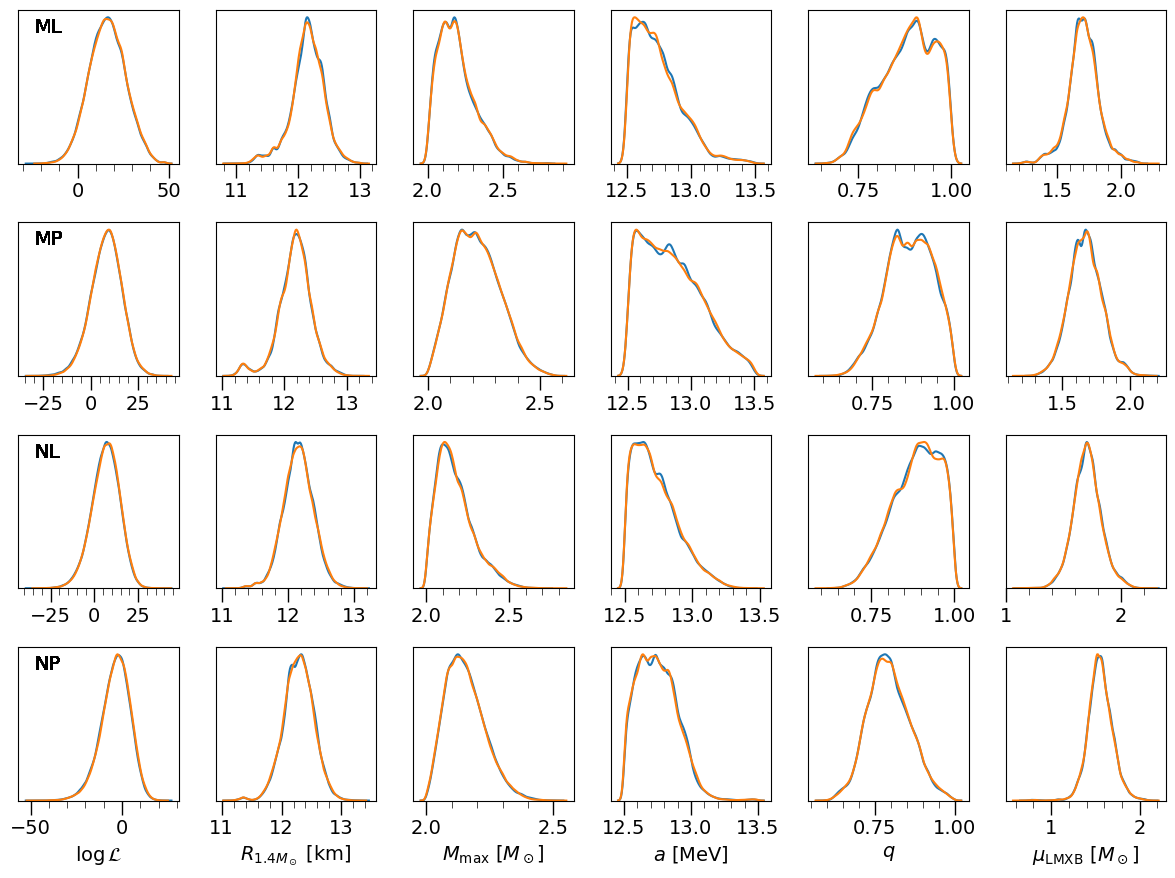

In [20]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(4, 6, figsize=(12,9))

for i in range(4):
    for j in range(6):
        ax[i,j].minorticks_on()
        ax[i,j].tick_params('both', which='major', length=10, width=1.0)
        ax[i,j].tick_params('both', which='minor', length=5,  width=0.5)
        #ax[i,j].grid(which='major', linewidth=0.2, visible=True)
        #ax[i,j].grid(which='minor', linewidth=0.1, visible=True)
        ax[i,j].yaxis.set_visible(False)
        if i==3:
            if j==0:
                ax[i,j].set_xlabel('$\log \mathcal{L}$') 
            if j==1:
                ax[i,j].set_xlabel('$R_{1.4M_\odot}$ [km]')
            if j==2:
                ax[i,j].set_xlabel('$M_\mathrm{max}~[M_\odot]$')
            if j==3:
                ax[i,j].set_xlabel('$a$ [MeV]')
            if j==4:
                ax[i,j].set_xlabel('$q$')
            if j==5:
                ax[i,j].set_xlabel('$\mu_\mathrm{LMXB}~[M_\odot]$')
        ax[0,0].text(0.1, 0.85, 'ML', transform=ax[0,0].transAxes)
        ax[1,0].text(0.1, 0.85, 'MP', transform=ax[1,0].transAxes)
        ax[2,0].text(0.1, 0.85, 'NL', transform=ax[2,0].transAxes)
        ax[3,0].text(0.1, 0.85, 'NP', transform=ax[3,0].transAxes)

sns.kdeplot(wgt1_ml, ax=ax[0,0])
sns.kdeplot(wgt2_ml, ax=ax[0,0])
sns.kdeplot(wgt1_mp, ax=ax[1,0])
sns.kdeplot(wgt2_mp, ax=ax[1,0])
sns.kdeplot(wgt1_nl, ax=ax[2,0])
sns.kdeplot(wgt2_nl, ax=ax[2,0])
sns.kdeplot(wgt1_np, ax=ax[3,0])
sns.kdeplot(wgt2_np, ax=ax[3,0])

sns.kdeplot(r431_ml, ax=ax[0,1])
sns.kdeplot(r432_ml, ax=ax[0,1])
sns.kdeplot(r431_mp, ax=ax[1,1])
sns.kdeplot(r432_mp, ax=ax[1,1])
sns.kdeplot(r431_nl, ax=ax[2,1])
sns.kdeplot(r432_nl, ax=ax[2,1])
sns.kdeplot(r431_np, ax=ax[3,1])
sns.kdeplot(r432_np, ax=ax[3,1])

sns.kdeplot(mmax1_ml, ax=ax[0,2])
sns.kdeplot(mmax2_ml, ax=ax[0,2])
sns.kdeplot(mmax1_mp, ax=ax[1,2])
sns.kdeplot(mmax2_mp, ax=ax[1,2])
sns.kdeplot(mmax1_nl, ax=ax[2,2])
sns.kdeplot(mmax2_nl, ax=ax[2,2])
sns.kdeplot(mmax1_np, ax=ax[3,2])
sns.kdeplot(mmax2_np, ax=ax[3,2])

sns.kdeplot(a1_ml, ax=ax[0,3])
sns.kdeplot(a2_ml, ax=ax[0,3])
sns.kdeplot(a1_mp, ax=ax[1,3])
sns.kdeplot(a2_mp, ax=ax[1,3])
sns.kdeplot(a1_nl, ax=ax[2,3])
sns.kdeplot(a2_nl, ax=ax[2,3])
sns.kdeplot(a1_np, ax=ax[3,3])
sns.kdeplot(a2_np, ax=ax[3,3])

sns.kdeplot(q1_ml, ax=ax[0,4])
sns.kdeplot(q2_ml, ax=ax[0,4])
sns.kdeplot(q1_mp, ax=ax[1,4])
sns.kdeplot(q2_mp, ax=ax[1,4])
sns.kdeplot(q1_nl, ax=ax[2,4])
sns.kdeplot(q2_nl, ax=ax[2,4])
sns.kdeplot(q1_np, ax=ax[3,4])
sns.kdeplot(q2_np, ax=ax[3,4])

sns.kdeplot(mean1_ml, ax=ax[0,5])
sns.kdeplot(mean2_ml, ax=ax[0,5])
sns.kdeplot(mean1_mp, ax=ax[1,5])
sns.kdeplot(mean2_mp, ax=ax[1,5])
sns.kdeplot(mean1_nl, ax=ax[2,5])
sns.kdeplot(mean2_nl, ax=ax[2,5])
sns.kdeplot(mean1_np, ax=ax[3,5])
sns.kdeplot(mean2_np, ax=ax[3,5])

#plt.savefig('figs/kde_all.png', format='png', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()

<Axes: ylabel='Density'>

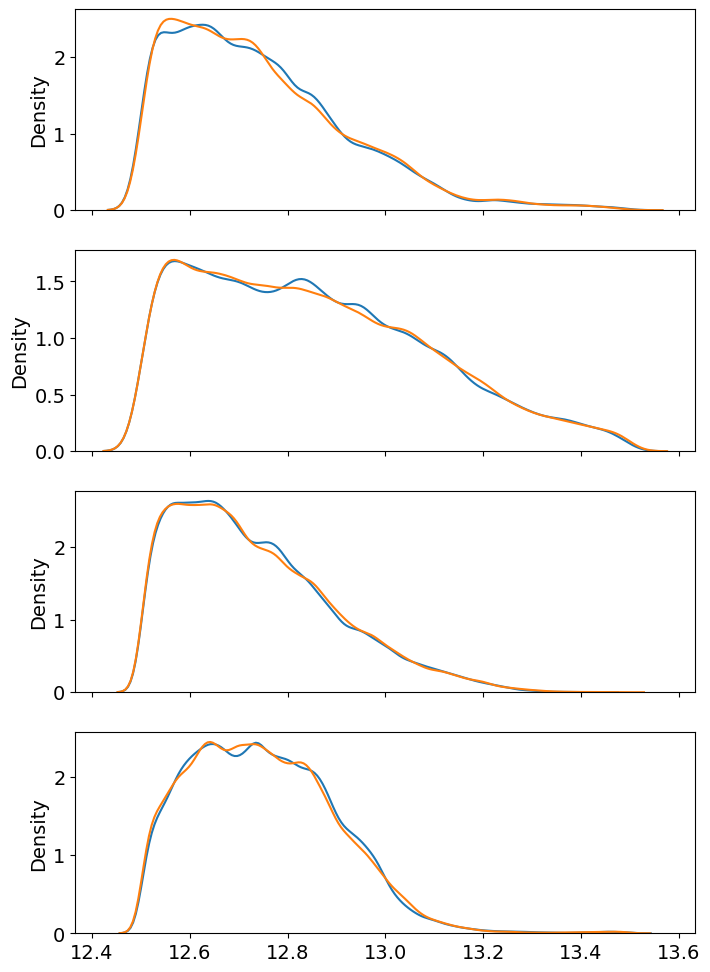

In [28]:
fig, ax = plt.subplots(4, 1, figsize=(8,12), sharex=True)
sns.kdeplot(a1_ml, ax=ax[0])
sns.kdeplot(a2_ml, ax=ax[0])
sns.kdeplot(a1_mp, ax=ax[1])
sns.kdeplot(a2_mp, ax=ax[1])
sns.kdeplot(a1_nl, ax=ax[2])
sns.kdeplot(a2_nl, ax=ax[2])
sns.kdeplot(a1_np, ax=ax[3])
sns.kdeplot(a2_np, ax=ax[3])

## KDE Plots

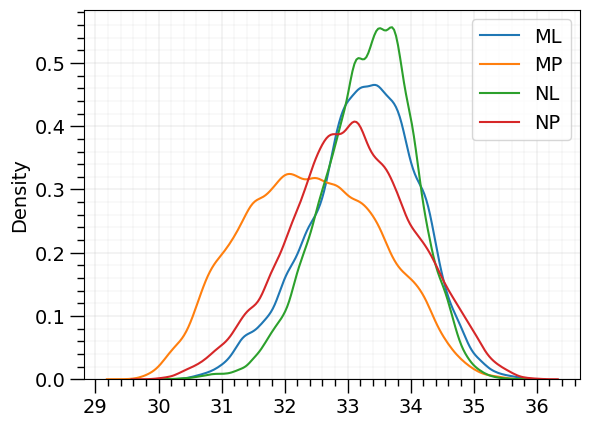

In [2]:
a_ml = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['param_S'])
a_mp = np.array(h5py.File('mp_51','r')['markov_chain_0']['data']['param_S'])
a_nl = np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['param_S'])
a_np = np.array(h5py.File('np_50','r')['markov_chain_0']['data']['param_S'])
sns.kdeplot(a_ml, label='ML')
sns.kdeplot(a_mp, label='MP')
sns.kdeplot(a_nl, label='NL')
sns.kdeplot(a_np, label='NP')
plt.minorticks_on()
plt.tick_params('both', length=10, width=1, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.grid(which='major', linewidth=0.2, visible=True)
plt.grid(which='minor', linewidth=0.1, visible=True)
plt.legend()
plt.show()

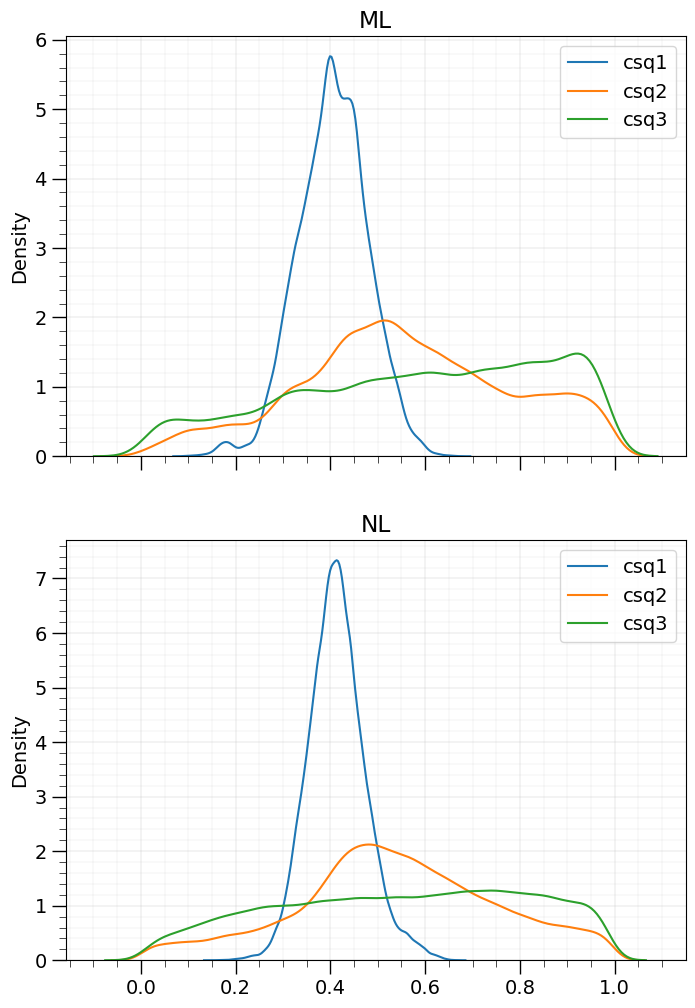

In [94]:
csq1_ml = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['csq1'])
csq2_ml = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['csq2'])
csq3_ml = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['csq3'])
csq1_nl = np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['csq1'])
csq2_nl = np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['csq2'])
csq3_nl = np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['csq3'])
fig, ax = plt.subplots(2, 1, figsize=(8,12), sharex=True)
ax[0].set_title('ML')
sns.kdeplot(csq1_ml, ax=ax[0], label='csq1')
sns.kdeplot(csq2_ml, ax=ax[0], label='csq2')
sns.kdeplot(csq3_ml, ax=ax[0], label='csq3')
ax[1].set_title('NL')
sns.kdeplot(csq1_nl, ax=ax[1], label='csq1')
sns.kdeplot(csq2_nl, ax=ax[1], label='csq2')
sns.kdeplot(csq3_nl, ax=ax[1], label='csq3')
for i in range(2):
    ax[i].minorticks_on()
    ax[i].tick_params('both', which='major', length=10, width=1.0)
    ax[i].tick_params('both', which='minor', length=5,  width=0.5)
    ax[i].grid(which='major', linewidth=0.2, visible=True)
    ax[i].grid(which='minor', linewidth=0.1, visible=True)
    ax[i].legend()

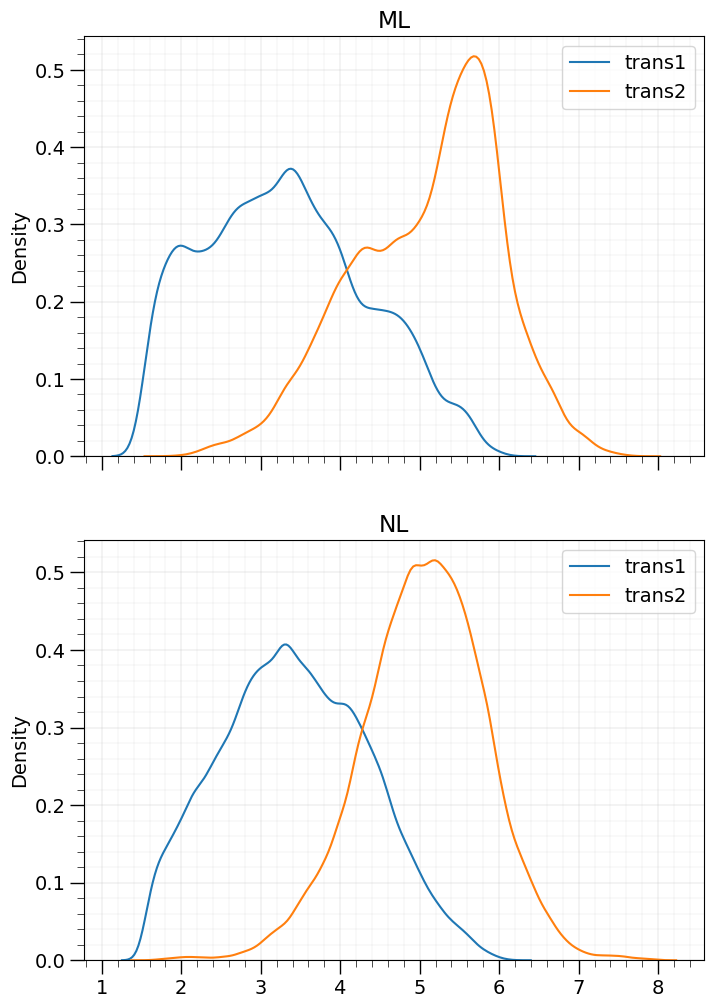

In [95]:
trans1_ml = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['trans1'])
trans2_ml = np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['trans2'])
trans1_nl = np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['trans1'])
trans2_nl = np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['trans2'])
fig, ax = plt.subplots(2, 1, figsize=(8,12), sharex=True)
ax[0].set_title('ML')
sns.kdeplot(trans1_ml, ax=ax[0], label='trans1')
sns.kdeplot(trans2_ml, ax=ax[0], label='trans2')
ax[1].set_title('NL')
sns.kdeplot(trans1_nl, ax=ax[1], label='trans1')
sns.kdeplot(trans2_nl, ax=ax[1], label='trans2')
for i in range(2):
    ax[i].minorticks_on()
    ax[i].tick_params('both', which='major', length=10, width=1.0)
    ax[i].tick_params('both', which='minor', length=5,  width=0.5)
    ax[i].grid(which='major', linewidth=0.2, visible=True)
    ax[i].grid(which='minor', linewidth=0.1, visible=True)
    ax[i].legend()

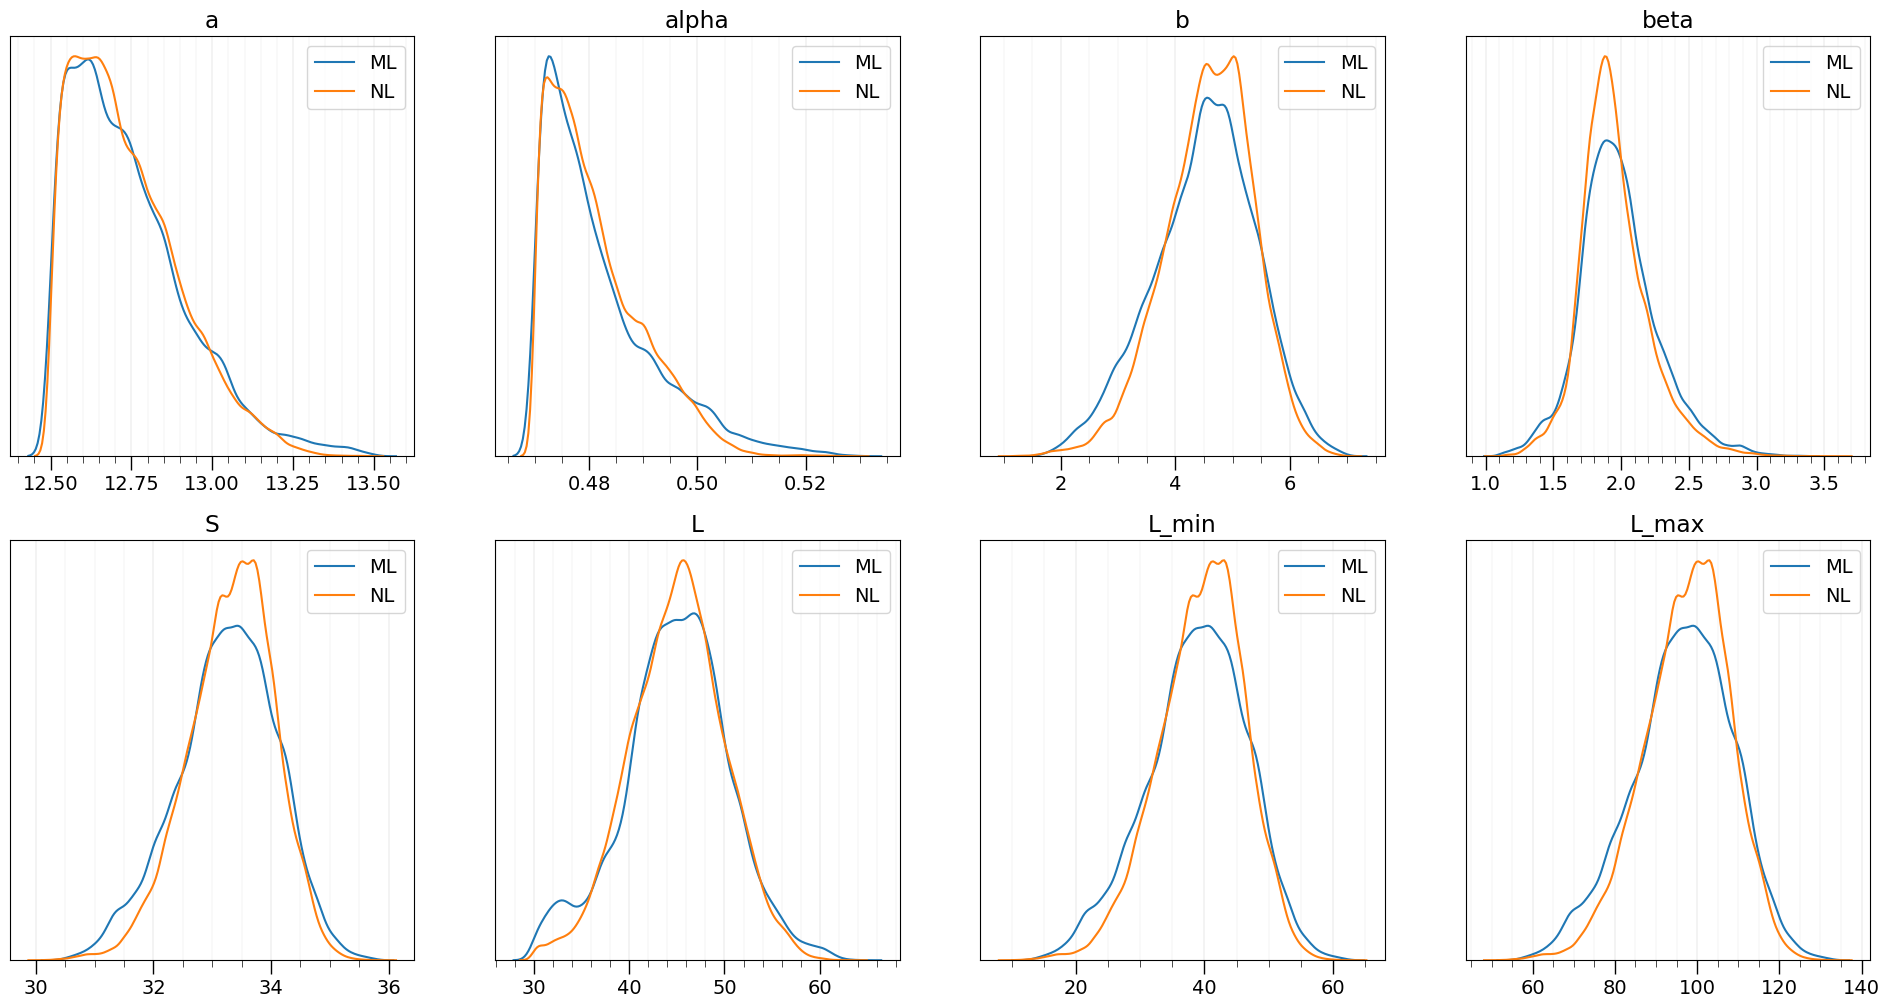

In [104]:
a_ml=np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['a'])
alpha_ml=np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['alpha'])
S_ml=np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['param_S'])
L_ml=np.array(h5py.File('ml_59','r')['markov_chain_0']['data']['param_L'])
a_nl=np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['a'])
alpha_nl=np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['alpha'])
S_nl=np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['param_S'])
L_nl=np.array(h5py.File('nl_50','r')['markov_chain_0']['data']['param_L'])

L_min_ml=9.17*S_ml-266.0
L_max_ml=14.3*S_ml-379.0
b_ml=S_ml-16.0-a_ml
beta_ml=(L_ml/3.0-a_ml*alpha_ml)/b_ml
L_min_nl=9.17*S_nl-266.0
L_max_nl=14.3*S_nl-379.0
b_nl=S_nl-16.0-a_nl
beta_nl=(L_nl/3.0-a_nl*alpha_nl)/b_nl

fig, ax = plt.subplots(2, 4, figsize=(24,12))
ax[0,0].set_title('a')
ax[0,1].set_title('alpha')
ax[1,0].set_title('S')
ax[1,1].set_title('L')
ax[0,2].set_title('b')
ax[0,3].set_title('beta')
ax[1,2].set_title('L_min')
ax[1,3].set_title('L_max')

sns.kdeplot(a_ml, ax=ax[0,0], label='ML')
sns.kdeplot(a_nl, ax=ax[0,0], label='NL')
sns.kdeplot(alpha_ml, ax=ax[0,1], label='ML')
sns.kdeplot(alpha_nl, ax=ax[0,1], label='NL')
sns.kdeplot(b_ml, ax=ax[0,2], label='ML')
sns.kdeplot(b_nl, ax=ax[0,2], label='NL')
sns.kdeplot(beta_ml, ax=ax[0,3], label='ML')
sns.kdeplot(beta_nl, ax=ax[0,3], label='NL')
sns.kdeplot(S_ml, ax=ax[1,0], label='ML')
sns.kdeplot(S_nl, ax=ax[1,0], label='NL')
sns.kdeplot(L_ml, ax=ax[1,1], label='ML')
sns.kdeplot(L_nl, ax=ax[1,1], label='NL')
sns.kdeplot(L_min_ml, ax=ax[1,2], label='ML')
sns.kdeplot(L_min_nl, ax=ax[1,2], label='NL')
sns.kdeplot(L_max_ml, ax=ax[1,3], label='ML')
sns.kdeplot(L_max_nl, ax=ax[1,3], label='NL')

for i in range(2):
    for j in range(4):
        ax[i,j].minorticks_on()
        ax[i,j].tick_params('both', which='major', length=10, width=1.0)
        ax[i,j].tick_params('both', which='minor', length=5,  width=0.5)
        ax[i,j].grid(which='major', linewidth=0.2, visible=True)
        ax[i,j].grid(which='minor', linewidth=0.1, visible=True)
        ax[i,j].yaxis.set_visible(False)
        ax[i,j].legend()


## Return Values

In [62]:
ret=list(h5py.File('ml_58a0','r')['ret_value_counts'])
iret_0=0;  iret_1=0;  iret_2=0;  iret_3=0;  iret_4=0;  
iret_5=0;  iret_6=0;  iret_7=0;  iret_8=0;  iret_9=0;  
iret_10=0; iret_11=0; iret_12=0; iret_13=0; iret_14=0; 
iret_15=0; iret_16=0; iret_17=0; iret_18=0; iret_19=0; 
iret_20=0; iret_21=0; iret_22=0; iret_23=0; iret_24=0;
for i in range(8):
    iret_0+=ret[i][0];   iret_1+=ret[i][1];   iret_2+=ret[i][2];   iret_3+=ret[i][3];   iret_4+=ret[i][4]; 
    iret_5+=ret[i][5];   iret_6+=ret[i][6];   iret_7+=ret[i][7];   iret_8+=ret[i][8];   iret_9+=ret[i][9]; 
    iret_10+=ret[i][10]; iret_11+=ret[i][11]; iret_12+=ret[i][12]; iret_13+=ret[i][13]; iret_14+=ret[i][14]; 
    iret_15+=ret[i][15]; iret_16+=ret[i][16]; iret_17+=ret[i][17]; iret_18+=ret[i][18]; iret_19+=ret[i][19]
    iret_20+=ret[i][20]; iret_21+=ret[i][21]; iret_22+=ret[i][22]; iret_23+=ret[i][23]; iret_24+=ret[i][24]
iret_0=iret_0/8;   iret_1=iret_1/8;   iret_2=iret_2/8;   iret_3=iret_3/8;   iret_4=iret_4/8;
iret_5=iret_5/8;   iret_6=iret_6/8;   iret_7=iret_7/8;   iret_8=iret_8/8;   iret_9=iret_9/8;
iret_10=iret_10/8; iret_11=iret_11/8; iret_12=iret_12/8; iret_13=iret_13/8; iret_14=iret_14/8;
iret_15=iret_15/8; iret_16=iret_16/8; iret_17=iret_17/8; iret_18=iret_18/8; iret_19=iret_19/8;
iret_20=iret_20/8; iret_21=iret_21/8; iret_22=iret_22/8; iret_23=iret_23/8; iret_24=iret_24/8;
iret=iret_0+iret_1+iret_2+iret_3+iret_4+iret_5+iret_6+iret_7+iret_8+iret_9+iret_10+iret_11+iret_12+iret_13 \
    +iret_14+iret_15+iret_16+iret_17+iret_18+iret_19+iret_20+iret_21+iret_22+iret_23+iret_24
print('ML')
print('mc reject =',         '{:.2f}'.format(iret_0/iret*100), '%')
print('mr_outside =',        '{:.2f}'.format(iret_2/iret*100), '%')
#print('r_outside =',         '{:.2f}'.format(iret_3/iret*100), '%')
#print('pressure_decrease =', '{:.2f}'.format(iret_4/iret*100), '%')
#print('nb_problem =',        '{:.2f}'.format(iret_5/iret*100), '%')
#print('nb_problem2 =',       '{:.2f}'.format(iret_6/iret*100), '%')
#print('crust_unstable =',    '{:.2f}'.format(iret_7/iret*100), '%')
#print('mvsr_failed =',       '{:.2f}'.format(iret_8/iret*100), '%')
#print('tov_failure =',       '{:.2f}'.format(iret_9/iret*100), '%')
print('small_max =',         '{:.2f}'.format(iret_10/iret*100), '%')
#print('tov_conv =',          '{:.2f}'.format(iret_11/iret*100), '%')
#print('mvsr_table =',        '{:.2f}'.format(iret_12/iret*100), '%')
print('eos_acausal =',       '{:.2f}'.format(iret_13/iret*100), '%')
#print('source_acausal =',    '{:.2f}'.format(iret_14/iret*100), '%')
print('eos_pars_mismatch =', '{:.2f}'.format(iret_15/iret*100), '%')
#print('pressure_negative =', '{:.2f}'.format(iret_16/iret*100), '%')
#print('no_eos_table =',      '{:.2f}'.format(iret_17/iret*100), '%')
#print('eos_solve_failed =',  '{:.2f}'.format(iret_18/iret*100), '%')
#print('trans_invalid =',     '{:.2f}'.format(iret_19/iret*100), '%')
#print('SL_invalid =',        '{:.2f}'.format(iret_20/iret*100), '%')
print('deriv_infinite =',    '{:.2f}'.format(iret_21/iret*100), '%')
#print('pop_wgt_zero =' ,     '{:.2f}'.format(iret_22/iret*100), '%')
print('ligo_mass_invalid =', '{:.2f}'.format(iret_23/iret*100), '%')
print('gm_exceeds_mmax =',   '{:.2f}'.format(iret_24/iret*100), '%')

ML
mc reject = 70.76 %
mr_outside = 0.69 %
small_max = 1.83 %
eos_acausal = 0.08 %
eos_pars_mismatch = 25.65 %
deriv_infinite = 0.11 %
ligo_mass_invalid = 0.35 %
gm_exceeds_mmax = 0.53 %


In [63]:
ret=list(h5py.File('nl_50a0','r')['ret_value_counts'])
iret_0=0;  iret_1=0;  iret_2=0;  iret_3=0;  iret_4=0;  
iret_5=0;  iret_6=0;  iret_7=0;  iret_8=0;  iret_9=0;  
iret_10=0; iret_11=0; iret_12=0; iret_13=0; iret_14=0; 
iret_15=0; iret_16=0; iret_17=0; iret_18=0; iret_19=0; 
iret_20=0; iret_21=0; iret_22=0; iret_23=0; iret_24=0;
for i in range(8):
    iret_0+=ret[i][0];   iret_1+=ret[i][1];   iret_2+=ret[i][2];   iret_3+=ret[i][3];   iret_4+=ret[i][4]; 
    iret_5+=ret[i][5];   iret_6+=ret[i][6];   iret_7+=ret[i][7];   iret_8+=ret[i][8];   iret_9+=ret[i][9]; 
    iret_10+=ret[i][10]; iret_11+=ret[i][11]; iret_12+=ret[i][12]; iret_13+=ret[i][13]; iret_14+=ret[i][14]; 
    iret_15+=ret[i][15]; iret_16+=ret[i][16]; iret_17+=ret[i][17]; iret_18+=ret[i][18]; iret_19+=ret[i][19]
    iret_20+=ret[i][20]; iret_21+=ret[i][21]; iret_22+=ret[i][22]; iret_23+=ret[i][23]; iret_24+=ret[i][24]
iret_0=iret_0/8;   iret_1=iret_1/8;   iret_2=iret_2/8;   iret_3=iret_3/8;   iret_4=iret_4/8;
iret_5=iret_5/8;   iret_6=iret_6/8;   iret_7=iret_7/8;   iret_8=iret_8/8;   iret_9=iret_9/8;
iret_10=iret_10/8; iret_11=iret_11/8; iret_12=iret_12/8; iret_13=iret_13/8; iret_14=iret_14/8;
iret_15=iret_15/8; iret_16=iret_16/8; iret_17=iret_17/8; iret_18=iret_18/8; iret_19=iret_19/8;
iret_20=iret_20/8; iret_21=iret_21/8; iret_22=iret_22/8; iret_23=iret_23/8; iret_24=iret_24/8;
iret=iret_0+iret_1+iret_2+iret_3+iret_4+iret_5+iret_6+iret_7+iret_8+iret_9+iret_10+iret_11+iret_12+iret_13 \
    +iret_14+iret_15+iret_16+iret_17+iret_18+iret_19+iret_20+iret_21+iret_22+iret_23+iret_24
print('NL')
print('mc reject =',         '{:.2f}'.format(iret_0/iret*100), '%')
print('mr_outside =',        '{:.2f}'.format(iret_2/iret*100), '%')
#print('r_outside =',         '{:.2f}'.format(iret_3/iret*100), '%')
#print('pressure_decrease =', '{:.2f}'.format(iret_4/iret*100), '%')
#print('nb_problem =',        '{:.2f}'.format(iret_5/iret*100), '%')
#print('nb_problem2 =',       '{:.2f}'.format(iret_6/iret*100), '%')
#print('crust_unstable =',    '{:.2f}'.format(iret_7/iret*100), '%')
#print('mvsr_failed =',       '{:.2f}'.format(iret_8/iret*100), '%')
#print('tov_failure =',       '{:.2f}'.format(iret_9/iret*100), '%')
print('small_max =',         '{:.2f}'.format(iret_10/iret*100), '%')
#print('tov_conv =',          '{:.2f}'.format(iret_11/iret*100), '%')
#print('mvsr_table =',        '{:.2f}'.format(iret_12/iret*100), '%')
print('eos_acausal =',       '{:.2f}'.format(iret_13/iret*100), '%')
#print('source_acausal =',    '{:.2f}'.format(iret_14/iret*100), '%')
print('eos_pars_mismatch =', '{:.2f}'.format(iret_15/iret*100), '%')
#print('pressure_negative =', '{:.2f}'.format(iret_16/iret*100), '%')
#print('no_eos_table =',      '{:.2f}'.format(iret_17/iret*100), '%')
#print('eos_solve_failed =',  '{:.2f}'.format(iret_18/iret*100), '%')
#print('trans_invalid =',     '{:.2f}'.format(iret_19/iret*100), '%')
#print('SL_invalid =',        '{:.2f}'.format(iret_20/iret*100), '%')
print('deriv_infinite =',    '{:.2f}'.format(iret_21/iret*100), '%')
#print('pop_wgt_zero =' ,     '{:.2f}'.format(iret_22/iret*100), '%')
print('ligo_mass_invalid =', '{:.2f}'.format(iret_23/iret*100), '%')
print('gm_exceeds_mmax =',   '{:.2f}'.format(iret_24/iret*100), '%')


NL
mc reject = 90.79 %
mr_outside = 1.14 %
small_max = 1.24 %
eos_acausal = 0.17 %
eos_pars_mismatch = 5.04 %
deriv_infinite = 0.03 %
ligo_mass_invalid = 0.61 %
gm_exceeds_mmax = 0.98 %


In [64]:
ret=list(h5py.File('mp_50a0','r')['ret_value_counts'])
iret_0=0;  iret_1=0;  iret_2=0;  iret_3=0;  iret_4=0;  
iret_5=0;  iret_6=0;  iret_7=0;  iret_8=0;  iret_9=0;  
iret_10=0; iret_11=0; iret_12=0; iret_13=0; iret_14=0; 
iret_15=0; iret_16=0; iret_17=0; iret_18=0; iret_19=0; 
iret_20=0; iret_21=0; iret_22=0; iret_23=0; iret_24=0;
for i in range(8):
    iret_0+=ret[i][0];   iret_1+=ret[i][1];   iret_2+=ret[i][2];   iret_3+=ret[i][3];   iret_4+=ret[i][4]; 
    iret_5+=ret[i][5];   iret_6+=ret[i][6];   iret_7+=ret[i][7];   iret_8+=ret[i][8];   iret_9+=ret[i][9]; 
    iret_10+=ret[i][10]; iret_11+=ret[i][11]; iret_12+=ret[i][12]; iret_13+=ret[i][13]; iret_14+=ret[i][14]; 
    iret_15+=ret[i][15]; iret_16+=ret[i][16]; iret_17+=ret[i][17]; iret_18+=ret[i][18]; iret_19+=ret[i][19]
    iret_20+=ret[i][20]; iret_21+=ret[i][21]; iret_22+=ret[i][22]; iret_23+=ret[i][23]; iret_24+=ret[i][24]
iret_0=iret_0/8;   iret_1=iret_1/8;   iret_2=iret_2/8;   iret_3=iret_3/8;   iret_4=iret_4/8;
iret_5=iret_5/8;   iret_6=iret_6/8;   iret_7=iret_7/8;   iret_8=iret_8/8;   iret_9=iret_9/8;
iret_10=iret_10/8; iret_11=iret_11/8; iret_12=iret_12/8; iret_13=iret_13/8; iret_14=iret_14/8;
iret_15=iret_15/8; iret_16=iret_16/8; iret_17=iret_17/8; iret_18=iret_18/8; iret_19=iret_19/8;
iret_20=iret_20/8; iret_21=iret_21/8; iret_22=iret_22/8; iret_23=iret_23/8; iret_24=iret_24/8;
iret=iret_0+iret_1+iret_2+iret_3+iret_4+iret_5+iret_6+iret_7+iret_8+iret_9+iret_10+iret_11+iret_12+iret_13 \
    +iret_14+iret_15+iret_16+iret_17+iret_18+iret_19+iret_20+iret_21+iret_22+iret_23+iret_24
print('MP')
print('mc reject =',         '{:.2f}'.format(iret_0/iret*100), '%')
print('mr_outside =',        '{:.2f}'.format(iret_2/iret*100), '%')
#print('r_outside =',         '{:.2f}'.format(iret_3/iret*100), '%')
#print('pressure_decrease =', '{:.2f}'.format(iret_4/iret*100), '%')
#print('nb_problem =',        '{:.2f}'.format(iret_5/iret*100), '%')
#print('nb_problem2 =',       '{:.2f}'.format(iret_6/iret*100), '%')
#print('crust_unstable =',    '{:.2f}'.format(iret_7/iret*100), '%')
#print('mvsr_failed =',       '{:.2f}'.format(iret_8/iret*100), '%')
#print('tov_failure =',       '{:.2f}'.format(iret_9/iret*100), '%')
print('small_max =',         '{:.2f}'.format(iret_10/iret*100), '%')
#print('tov_conv =',          '{:.2f}'.format(iret_11/iret*100), '%')
#print('mvsr_table =',        '{:.2f}'.format(iret_12/iret*100), '%')
print('eos_acausal =',       '{:.2f}'.format(iret_13/iret*100), '%')
#print('source_acausal =',    '{:.2f}'.format(iret_14/iret*100), '%')
print('eos_pars_mismatch =', '{:.2f}'.format(iret_15/iret*100), '%')
#print('pressure_negative =', '{:.2f}'.format(iret_16/iret*100), '%')
#print('no_eos_table =',      '{:.2f}'.format(iret_17/iret*100), '%')
#print('eos_solve_failed =',  '{:.2f}'.format(iret_18/iret*100), '%')
#print('trans_invalid =',     '{:.2f}'.format(iret_19/iret*100), '%')
#print('SL_invalid =',        '{:.2f}'.format(iret_20/iret*100), '%')
print('deriv_infinite =',    '{:.2f}'.format(iret_21/iret*100), '%')
#print('pop_wgt_zero =' ,     '{:.2f}'.format(iret_22/iret*100), '%')
print('ligo_mass_invalid =', '{:.2f}'.format(iret_23/iret*100), '%')
print('gm_exceeds_mmax =',   '{:.2f}'.format(iret_24/iret*100), '%')


MP
mc reject = 69.10 %
mr_outside = 1.81 %
small_max = 4.59 %
eos_acausal = 12.04 %
eos_pars_mismatch = 10.78 %
deriv_infinite = 0.17 %
ligo_mass_invalid = 0.32 %
gm_exceeds_mmax = 1.19 %


In [82]:
ret=list(h5py.File('np_50a0','r')['ret_value_counts'])
iret_0=0;  iret_1=0;  iret_2=0;  iret_3=0;  iret_4=0;  
iret_5=0;  iret_6=0;  iret_7=0;  iret_8=0;  iret_9=0;  
iret_10=0; iret_11=0; iret_12=0; iret_13=0; iret_14=0; 
iret_15=0; iret_16=0; iret_17=0; iret_18=0; iret_19=0; 
iret_20=0; iret_21=0; iret_22=0; iret_23=0; iret_24=0;
for i in range(8):
    iret_0+=ret[i][0];   iret_1+=ret[i][1];   iret_2+=ret[i][2];   iret_3+=ret[i][3];   iret_4+=ret[i][4]; 
    iret_5+=ret[i][5];   iret_6+=ret[i][6];   iret_7+=ret[i][7];   iret_8+=ret[i][8];   iret_9+=ret[i][9]; 
    iret_10+=ret[i][10]; iret_11+=ret[i][11]; iret_12+=ret[i][12]; iret_13+=ret[i][13]; iret_14+=ret[i][14]; 
    iret_15+=ret[i][15]; iret_16+=ret[i][16]; iret_17+=ret[i][17]; iret_18+=ret[i][18]; iret_19+=ret[i][19]
    iret_20+=ret[i][20]; iret_21+=ret[i][21]; iret_22+=ret[i][22]; iret_23+=ret[i][23]; iret_24+=ret[i][24]
iret_0=iret_0/8;   iret_1=iret_1/8;   iret_2=iret_2/8;   iret_3=iret_3/8;   iret_4=iret_4/8;
iret_5=iret_5/8;   iret_6=iret_6/8;   iret_7=iret_7/8;   iret_8=iret_8/8;   iret_9=iret_9/8;
iret_10=iret_10/8; iret_11=iret_11/8; iret_12=iret_12/8; iret_13=iret_13/8; iret_14=iret_14/8;
iret_15=iret_15/8; iret_16=iret_16/8; iret_17=iret_17/8; iret_18=iret_18/8; iret_19=iret_19/8;
iret_20=iret_20/8; iret_21=iret_21/8; iret_22=iret_22/8; iret_23=iret_23/8; iret_24=iret_24/8;
iret=iret_0+iret_1+iret_2+iret_3+iret_4+iret_5+iret_6+iret_7+iret_8+iret_9+iret_10+iret_11+iret_12+iret_13 \
    +iret_14+iret_15+iret_16+iret_17+iret_18+iret_19+iret_20+iret_21+iret_22+iret_23+iret_24
print('NP')
print('mc reject =',         '{:.2f}'.format(iret_0/iret*100), '%')
print('mr_outside =',        '{:.2f}'.format(iret_2/iret*100), '%')
#print('r_outside =',         '{:.2f}'.format(iret_3/iret*100), '%')
#print('pressure_decrease =', '{:.2f}'.format(iret_4/iret*100), '%')
#print('nb_problem =',        '{:.2f}'.format(iret_5/iret*100), '%')
#print('nb_problem2 =',       '{:.2f}'.format(iret_6/iret*100), '%')
#print('crust_unstable =',    '{:.2f}'.format(iret_7/iret*100), '%')
#print('mvsr_failed =',       '{:.2f}'.format(iret_8/iret*100), '%')
#print('tov_failure =',       '{:.2f}'.format(iret_9/iret*100), '%')
print('small_max =',         '{:.2f}'.format(iret_10/iret*100), '%')
#print('tov_conv =',          '{:.2f}'.format(iret_11/iret*100), '%')
#print('mvsr_table =',        '{:.2f}'.format(iret_12/iret*100), '%')
print('eos_acausal =',       '{:.2f}'.format(iret_13/iret*100), '%')
#print('source_acausal =',    '{:.2f}'.format(iret_14/iret*100), '%')
print('eos_pars_mismatch =', '{:.2f}'.format(iret_15/iret*100), '%')
#print('pressure_negative =', '{:.2f}'.format(iret_16/iret*100), '%')
#print('no_eos_table =',      '{:.2f}'.format(iret_17/iret*100), '%')
#print('eos_solve_failed =',  '{:.2f}'.format(iret_18/iret*100), '%')
#print('trans_invalid =',     '{:.2f}'.format(iret_19/iret*100), '%')
#print('SL_invalid =',        '{:.2f}'.format(iret_20/iret*100), '%')
print('deriv_infinite =',    '{:.2f}'.format(iret_21/iret*100), '%')
#print('pop_wgt_zero =' ,     '{:.2f}'.format(iret_22/iret*100), '%')
print('ligo_mass_invalid =', '{:.2f}'.format(iret_23/iret*100), '%')
print('gm_exceeds_mmax =',   '{:.2f}'.format(iret_24/iret*100), '%')


NP
mc reject = 69.11 %
mr_outside = 1.61 %
small_max = 8.02 %
eos_acausal = 9.96 %
eos_pars_mismatch = 4.29 %
deriv_infinite = 0.04 %
ligo_mass_invalid = 0.38 %
gm_exceeds_mmax = 6.57 %
